In [ ]:
import nltk
from nltk.corpus import PlaintextCorpusReader
from gensim import corpora
from gensim.models.ldamodel import LdaModel
from gensim.parsing.preprocessing import STOPWORDS
from nltk.probability import FreqDist
from wordcloud import WordCloud
import matplotlib.pyplot as plt
%matplotlib inline
import pprint
import os

In [ ]:
folders = ["red", "green", "blue"]
for folder in folders:
    for count, filename in enumerate(os.listdir(folder)):
        dst = f"{folder}.{str(count+1)}"
        src =f"{folder}/{filename}"  # foldername/filename, if .py file is outside folder
        dst =f"{folder}/{dst}"
        os.rename(src, dst)

In [ ]:
import nltk
from nltk.corpus import PlaintextCorpusReader
red_root = "red"
green_root = "green"
blue_root = "blue"
red_files = "red.*"
green_files = "green.*"
blue_files = "blue.*"
red_data = PlaintextCorpusReader(red_root,red_files)
green_data = PlaintextCorpusReader(green_root,green_files)
blue_data = PlaintextCorpusReader(blue_root,blue_files)
file_data = [red_data, green_data, blue_data]

In [ ]:
#repo_data = [('red',red_data.raw()), ('green',green_data.raw()), ('blue',blue_data.raw())]

In [ ]:
#extract contents as documents, removing stopwords
documents = [doc.raw(fileid) for doc in file_data for fileid in doc.fileids()]
texts = [[word for word in document.lower().split()
        if word not in STOPWORDS and word.isalnum()]
        for document in documents]

#preprocess for LDA
dictionary = corpora.Dictionary(texts)
corpus = [dictionary.doc2bow(text) for text in texts]

#Set parameters for LDA
num_topics = 3 #The number of topics that should be generated
passes = 10

#build the model
lda = LdaModel(corpus,
              id2word=dictionary,
              num_topics=num_topics,
              passes=passes)

In [ ]:
# assign documents to topics based on highest probability topic
from operator import itemgetter
topic_assignment = [sorted(lda.get_document_topics(corpus[i],minimum_probability=0,per_word_topics=False),
                           key=itemgetter(1),reverse=True)[0][0] for i in range(len(corpus))]
print(topic_assignment)

[0, 2, 1, 0, 0, 1, 1, 0, 0, 1, 1, 2, 0, 0, 0, 0, 0, 1, 2, 1, 2, 0, 2, 1, 2, 0, 0, 2, 1, 0, 2, 0, 2, 2, 1, 1, 0, 2, 0, 1, 1, 0, 1, 2, 2, 2, 0, 1, 2, 2, 2, 0, 2, 2, 2, 0, 0]


In [ ]:
# determine new name for each file based on highest frequency word
most_frequent_words = [FreqDist(text).most_common(1)[0] for text in texts]
filenames = [x[0]+str(x[1]) for x in most_frequent_words]
print(filenames)

['lakers8', 'lyra11', 'mafalda15', 'lakers8', 'davis16', 'census19', 'students40', 'pantone18', 'miami5', 'brady17', 'voting29', 'parton27', 'nba14', 'herro13', 'cubs15', 'workers4', 'lakers8', 'testosterone31', 'think22', 'airbnb20', 'rent31', 'lebron11', 'herman3', 'unemployment8', 'clippers14', 'neuman9', 'morris16', 'people11', 'mafalda15', 'hannah25', 'kind5', 'pelosi12', 'trump19', 'baron5', 'tax13', 'eviction19', 'mortadella26', 'lyra11', 'butler28', 'voting29', 'heat7', 'soccer13', 'students40', 'wnba15', 'parton27', 'baron5', 'world9', 'voting29', 'guitar13', 'wnba15', 'big15', 'morris16', 'tax19', 'mcconnell5', 'brooks32', 'tour14', 'heat7']


In [ ]:
lda.show_topics()

[(0,
  '0.008*"like" + 0.007*"game" + 0.006*"lakers" + 0.006*"nba" + 0.006*"lebron" + 0.005*"sports" + 0.004*"2020" + 0.004*"slate" + 0.004*"time" + 0.004*"heat"'),
 (1,
  '0.007*"voting" + 0.006*"students" + 0.006*"like" + 0.005*"university" + 0.004*"sports" + 0.004*"said" + 0.004*"early" + 0.004*"new" + 0.004*"people" + 0.004*"milwaukee"'),
 (2,
  '0.007*"like" + 0.005*"people" + 0.004*"parton" + 0.004*"new" + 0.004*"trump" + 0.004*"think" + 0.003*"going" + 0.003*"tax" + 0.003*"right" + 0.003*"wnba"')]

In [ ]:
# create new directory names based on the words in each topic
# each dirname is obtained by concatenating the top 3 words in each topic

topics = [topic[1].split('+')[0:3] for topic in lda.show_topics()]
newdirnames = [topic[0].split('*')[1].replace('"','').strip() + 
 topic[1].split('*')[1].replace('"','').strip() + 
 topic[2].split('*')[1].replace('"','').strip()  for topic in topics]
print(topics)
print(newdirnames)

[['0.008*"like" ', ' 0.007*"game" ', ' 0.006*"lakers" '], ['0.007*"voting" ', ' 0.006*"students" ', ' 0.006*"like" '], ['0.007*"like" ', ' 0.005*"people" ', ' 0.004*"parton" ']]
['likegamelakers', 'votingstudentslike', 'likepeopleparton']


In [ ]:
#create the new dirs
for dirname in newdirnames:
    os.mkdir('./'+ dirname)

#rename file and write to new dir
for item in range(len(documents)):
    newname = filenames[item]
    topic_id = topic_assignment[item]
    dirname = newdirnames[topic_id]
    textfile = open('./'+ dirname + '/' + newname + '.txt', 'w')
    textfile.write(documents[item])
    textfile.close()

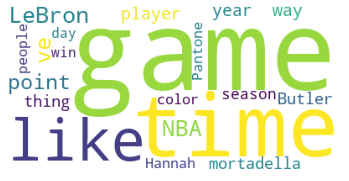

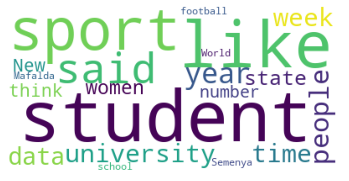

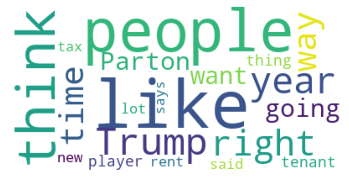

In [ ]:
# read files from each new dir and create wordclouds based on their content and write out wordcloud as an image file
for dirname in newdirnames:
    file_root = "./" + dirname
    file_data = PlaintextCorpusReader(file_root,'.*.txt')
    wordcloud = WordCloud(stopwords=STOPWORDS,background_color='white',max_words=20).generate(file_data.raw())
    plt.imshow(wordcloud)
    plt.axis('off')
    plt.savefig(file_root + '/' + 'picture.png',dpi=100)
    plt.show()